In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
rng = np.random.default_rng(123)
n = 2000

mean = [0,2]

sigma_1 = 1
sigma_2 = 1.5
rho = 0.6

cov = [[sigma_1**2, rho*sigma_1*sigma_2],
       [rho*sigma_1*sigma_2, sigma_2**2]]

X1, X2 = rng.multivariate_normal(mean = mean, cov = cov, size=n).T


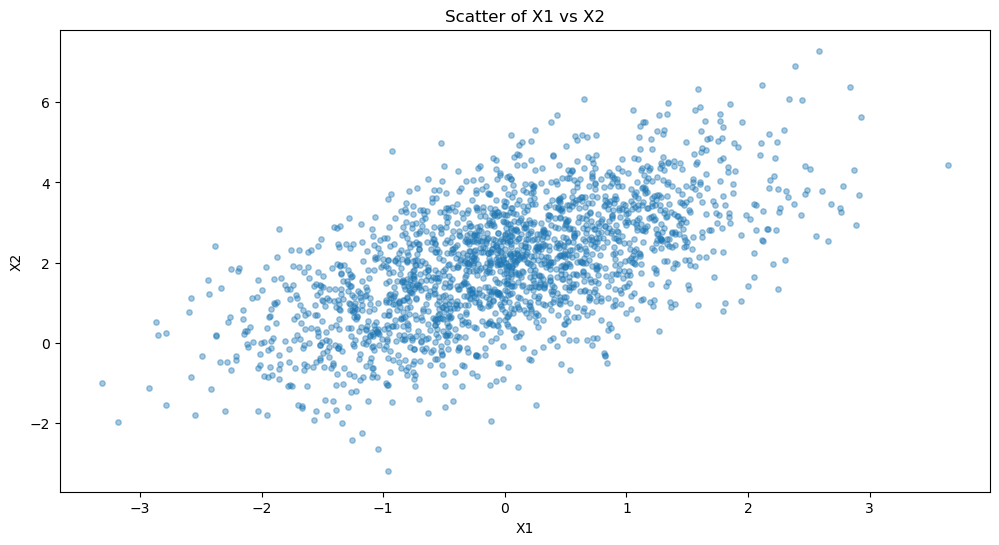

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(X1, X2, alpha=0.4, s=15)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Scatter of X1 vs X2")
plt.show()

In [42]:
X3 = rng.gamma(shape=2, scale=1, size=n)
X4 = rng.gamma(shape=5, scale=0.5, size = n)

B1 = rng.binomial(n=1, p=0.5, size=n)
B2 = rng.binomial(n=1, p=0.2, size=n)

C = rng.choice([1,2,3,4], p = [0.1, 0.3, 0.4, 0.2], size = n)

data = pd.DataFrame({
    "X1": X1,
    "X2": X2,
    "X3": X3,
    "X4": X4,
    "B1": B1,
    "B2": B2,
    "C": C
})


dummies_C = pd.get_dummies(data['C'], prefix='C', drop_first=True).astype(int)

data_full = pd.concat([data, dummies_C], axis = 1)

data_full['X2_sq'] = data_full['X2']**2
data_full['X1_B1'] = data_full['X1']*data_full['B1']

data_full.head()

,X1,X2,X3,X4,B1,B2,C,C_2,C_3,C_4,X2_sq,X1_B1
0,0.993252,3.321703,1.362653,5.085810,0,0,3,0,1,0,11.033712,0.000000
1,-1.109631,0.182956,0.696269,1.541957,0,0,3,0,1,0,0.033473,-0.000000
2,-1.075525,0.849565,0.459306,3.031101,1,1,4,0,0,1,0.721760,-1.075525
3,0.137186,3.112997,1.013941,1.064868,1,0,4,0,0,1,9.690751,0.137186
4,0.449859,2.354038,1.340994,2.495068,1,0,2,1,0,0,5.541494,0.449859


In [45]:
# Multicolienarity

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = data_full.drop(columns=['C'])

X_vif = sm.add_constant(X)

vif_data = pd.DataFrame()

vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data

,Variable,VIF
0,const,21.399580
1,X1,2.630976
2,X2,5.072831
3,X3,1.006559
4,X4,1.003361
5,B1,1.005302
6,B2,1.002377
7,C_2,2.682743
8,C_3,2.848865
9,C_4,2.346032


In [48]:
# Coefficients
beta0 = 0
beta1, beta2, beta3, beta4 = 1.0, -0.5, 0.8, -0.3
beta5, beta6 = 2.0, -1.5
gamma2, gamma3, gamma4 = 0.5, 1.0, -0.5
beta7, beta8 = 1.0, 0.2
sigma = 2.0

# Compute Y
epsilon = rng.normal(0, sigma, n)
y = (beta0
     + beta1 * data_full["X1"]
     + beta2 * data_full["X2"]
     + beta3 * data_full["X3"]
     + beta4 * data_full["X4"]
     + beta5 * data_full["B1"]
     + beta6 * data_full["B2"]
     + gamma2 * data_full["C_2"]
     + gamma3 * data_full["C_3"]
     + gamma4 * data_full["C_4"]
     + beta7 * data_full["X1_B1"]
     + beta8 * data_full["X2_sq"]
     + epsilon)

data_full["Y"] = y
data_full.head()


,X1,X2,X3,X4,B1,B2,C,C_2,C_3,C_4,X2_sq,X1_B1,Y
0,0.993252,3.321703,1.362653,5.085810,0,0,3,0,1,0,11.033712,0.000000,1.485743
1,-1.109631,0.182956,0.696269,1.541957,0,0,3,0,1,0,0.033473,-0.000000,3.148003
2,-1.075525,0.849565,0.459306,3.031101,1,1,4,0,0,1,0.721760,-1.075525,0.661278
3,0.137186,3.112997,1.013941,1.064868,1,0,4,0,0,1,9.690751,0.137186,2.991552
4,0.449859,2.354038,1.340994,2.495068,1,0,2,1,0,0,5.541494,0.449859,1.081523


In [49]:
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              581.2
Date:                Mon, 10 Nov 2025   Prob (F-statistic):                        0.00
Time:                        11:30:25   Log-Likelihood:                         -4158.9
No. Observations:                2000   AIC:                                      8340.
Df Residuals:                    1989   BIC:                                      8401.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.8874      0.068     13.086      0.000       0.754       1.020
X2            -0.3939      0.062     -6.361      0.000      -0.515      -0.272
X3             0.7876      0.030     26.137      0.000       0.728       0.847
X4            -0.3556      0.033    -10.690      0.000      -0.421      -0.290
B1             2.0965      0.086     24.512      0.000       1.929       2.264
B2            -1.3889      0.109    -12.735      0.000      -1.603      -1.175
C_2            0.3697      0.124      2.985      0.003       0.127       0.613
C_3            0.9463      0.118      8.011      0.000       0.715       1.178
C_4           -0.5230      0.135     -3.878      0.000      -0.787      -0.258
X2_sq          0.1884      0.014     13.782      0.000       0.162       0.215
X1_B1          1.1341      0.086     13.231      0.000       0.966       1.302
==============================================================================
Omnibus:                        2.627   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.401
Skew:                           0.001   Prob(JB):                        0.301
Kurtosis:                       2.830   Cond. No.                         41.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = model.resid
exog = sm.add_constant(model.model.exog) 

bp_test = het_breuschpagan(residuals, exog)
labels = ['LM stat', 'LM p-value', 'F-stat', 'F p-value']
dict(zip(labels, bp_test))


{'LM stat': 10.196266682088728,
 'LM p-value': 0.5128241268588649,
 'F-stat': 0.9260930807387476,
 'F p-value': 0.5139170799477768}

In [54]:
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = model.resid
exog = sm.add_constant(model.model.exog)

bp_test = het_breuschpagan(residuals, exog)
labels = ['LM stat', 'LM p-value', 'F-stat', 'F p-value']
dict(zip(labels, bp_test))

{'LM stat': 10.196266682088728,
 'LM p-value': 0.5128241268588649,
 'F-stat': 0.9260930807387476,
 'F p-value': 0.5139170799477768}

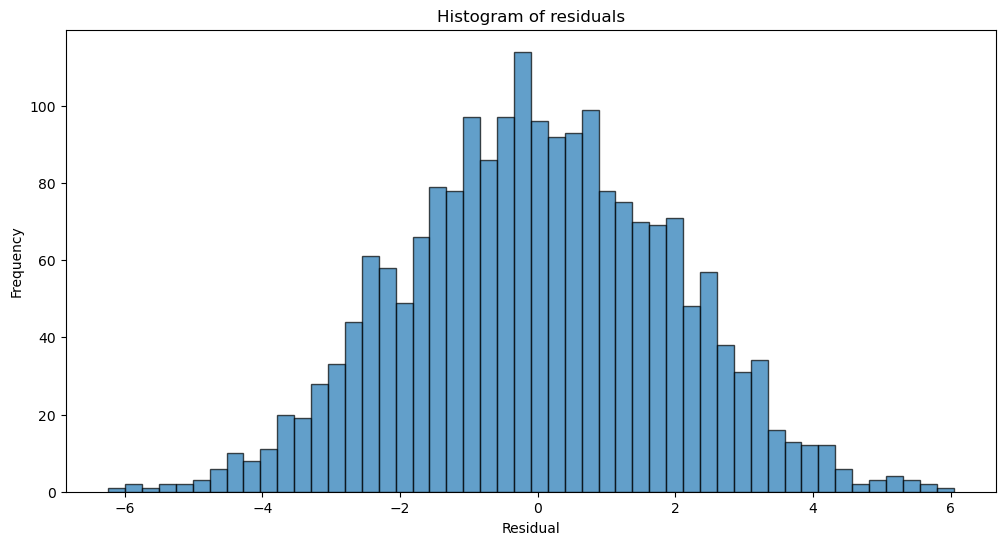

In [56]:
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(residuals, bins=50, edgecolor = 'black', alpha=0.7)
ax.set_xlabel('Residual')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of residuals')
plt.show()